In [1]:
import requests
import pandas as pd
from api_keys import IEX_api

In [21]:
data = pd.read_csv('../data/tech.csv').dropna(how = 'any', axis = 0)
data = data.sort_values(by='Market Cap', ascending=False).reset_index()
symbols = data['Symbol']


In [3]:
# ticker = 'AAPL'
period = 'annual'
last = '30'

In [5]:
#fundamentals
strategy = 'fundamentals'
stocks_not_found = []
opcash_to_capex = pd.DataFrame({
    'date':'',
    'Operating cash flow': '',
    'ticker': '',
    'capex': ''
}, index = range(0))
for j in range(len(symbols)):
    try:
        print(f'gathering data stock {j} of {len(symbols)}...')
        url = f'https://api.iex.cloud/v1/data/core/{strategy}/{symbols[j]}/{period}?last={last}&token={IEX_api}'
        response = requests.get(url)
        fundamentals = response.json()
        for i in range(len(fundamentals)):
            row = {'date': fundamentals[i]['date'],
                'Operating cash flow': fundamentals[i]['cashFlowOperating'],
                'ticker': symbols[j],
                'capex': fundamentals[i]['capex']}
            row = pd.DataFrame(row, index = [0])
            opcash_to_capex = pd.concat([opcash_to_capex, row], ignore_index=True)
    except:
        stocks_not_found.append(symbols[j])
        print(f'stock {symbols[j]} not found. moving on...')

opcash_to_capex['date'] = pd.to_datetime(opcash_to_capex['date'], unit = 'ms').dt.year
opcash_to_capex['Operating cash flow to capex'] =abs(opcash_to_capex['capex']/opcash_to_capex['Operating cash flow'] * 100)
opcash_to_capex.set_index('date')

gathering data stock 0 of 519...
gathering data stock 1 of 519...
gathering data stock 2 of 519...
gathering data stock 3 of 519...
gathering data stock 4 of 519...
gathering data stock 5 of 519...
gathering data stock 6 of 519...
gathering data stock 7 of 519...
gathering data stock 8 of 519...
gathering data stock 9 of 519...
gathering data stock 10 of 519...
gathering data stock 11 of 519...
gathering data stock 12 of 519...
gathering data stock 13 of 519...
gathering data stock 14 of 519...
gathering data stock 15 of 519...
gathering data stock 16 of 519...
gathering data stock 17 of 519...
gathering data stock 18 of 519...
gathering data stock 19 of 519...
gathering data stock 20 of 519...
gathering data stock 21 of 519...
gathering data stock 22 of 519...
gathering data stock 23 of 519...
gathering data stock 24 of 519...
gathering data stock 25 of 519...
gathering data stock 26 of 519...
gathering data stock 27 of 519...
gathering data stock 28 of 519...
gathering data stock 29 

,Operating cash flow,ticker,capex,Operating cash flow to capex
date,,,,
2023,110543000000,AAPL,-10959000000,9.913789
2022,122151000000,AAPL,-10708000000,8.766199
2021,104038000000,AAPL,-11085000000,10.654761
2020,80674000000,AAPL,-7309000000,9.05992
2019,69391000000,AAPL,-10495000000,15.12444
...,...,...,...,...
2022,-17514000,WISA,-43000,0.245518
2021,-11508000,WISA,-99000,0.860271
2020,-9859000,WISA,-52000,0.527437


In [6]:
opcash_to_capex

,date,Operating cash flow,ticker,capex,Operating cash flow to capex
0,2023,110543000000,AAPL,-10959000000,9.913789
1,2022,122151000000,AAPL,-10708000000,8.766199
2,2021,104038000000,AAPL,-11085000000,10.654761
3,2020,80674000000,AAPL,-7309000000,9.05992
4,2019,69391000000,AAPL,-10495000000,15.12444
...,...,...,...,...,...
3889,2022,-17514000,WISA,-43000,0.245518
3890,2021,-11508000,WISA,-99000,0.860271
3891,2020,-9859000,WISA,-52000,0.527437
3892,2019,-11032000,WISA,-35000,0.317259


In [17]:
opcash_to_capex.to_csv('opcash_to_capex_tech.csv')

<Axes: xlabel='date'>

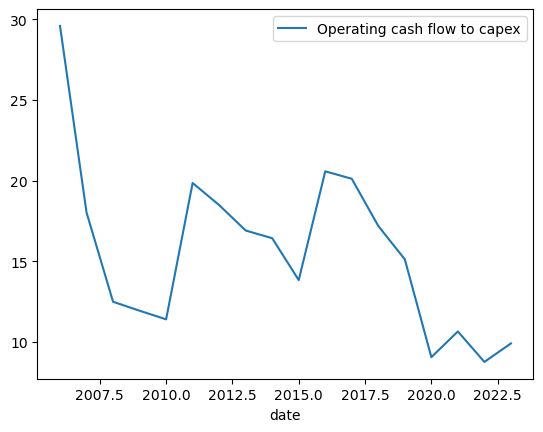

In [190]:
opcash_to_capex = opcash_to_capex[~(opcash_to_capex['capex'] == 0)]
opcash_to_capex.plot(x = 'date', y = 'Operating cash flow to capex')